# Task 2: Predicting Customer Buying Behaviour


In [15]:
# Importing all packages.

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif as mic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Importing dataset.

df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
print("\nDataset shape:", df.shape, "\n")
df.head()


Dataset shape: (50000, 14) 



,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [17]:
# Checking columns datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [18]:
# Categorical columns.
cat_cols = df.select_dtypes("object")

# Checking the unique values in Categorical columns.
for col in cat_cols:
    print("\nUnique values for column '{}':".format(col))
    print(df[col].unique(), "\nUnique count: {}".format(df[col].nunique()))


Unique values for column 'sales_channel':
['Internet' 'Mobile'] 
Unique count: 2

Unique values for column 'trip_type':
['RoundTrip' 'CircleTrip' 'OneWay'] 
Unique count: 3

Unique values for column 'flight_day':
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri'] 
Unique count: 7

Unique values for column 'route':
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANM

In [19]:
# Label Encoding the categorical variables.
label_encode = LabelEncoder()

for col in cat_cols:
    df[col] = label_encode.fit_transform(df[col])
    print("\nUnique values for column '{}':".format(col))
    print(df[col].unique(), "\nUnique count: {}".format(df[col].nunique()))


Unique values for column 'sales_channel':
[0 1] 
Unique count: 2

Unique values for column 'trip_type':
[2 0 1] 
Unique count: 3

Unique values for column 'flight_day':
[2 6 4 1 3 5 0] 
Unique count: 7

Unique values for column 'route':
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36  37  38
  39  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 121 122 125 126 127 129 130 131 132 133 134 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 157 158 159 160 161 162 163 165 166 167 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 185 187 188 189 190 192 193 194 195 196 197
 198 199 200 202 203 204 205 207

In [20]:
# Checking the datatypes of converted columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int32  
 7   route                  50000 non-null  int32  
 8   booking_origin         50000 non-null  int32  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.4 MB

In [21]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,1.987620,84.940480,23.04456,9.06634,3.069860,391.905800,38.263340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,2.029833,227.297259,32.756539,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.00000,5.00000,1.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.00000,9.00000,3.000000,381.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.00000,13.00000,5.000000,611.000000,57.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,6.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [22]:
# Converting the dataset into features and label.
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

In [23]:
# Calculating the Mutual Information Scores.
fi_scores = mic(X, y)
fi_df = pd.DataFrame({"Columns": X.columns, "Feature_Importance_Score": fi_scores})
fi_df = fi_df.sort_values(by="Feature_Importance_Score", ascending=False)
fi_df

,Columns,Feature_Importance_Score
7,route,0.051777
8,booking_origin,0.045525
12,flight_duration,0.017631
4,length_of_stay,0.011528
9,wants_extra_baggage,0.010659
2,trip_type,0.007072
11,wants_in_flight_meals,0.005717
5,flight_hour,0.004133
10,wants_preferred_seat,0.003187
0,num_passengers,0.003027


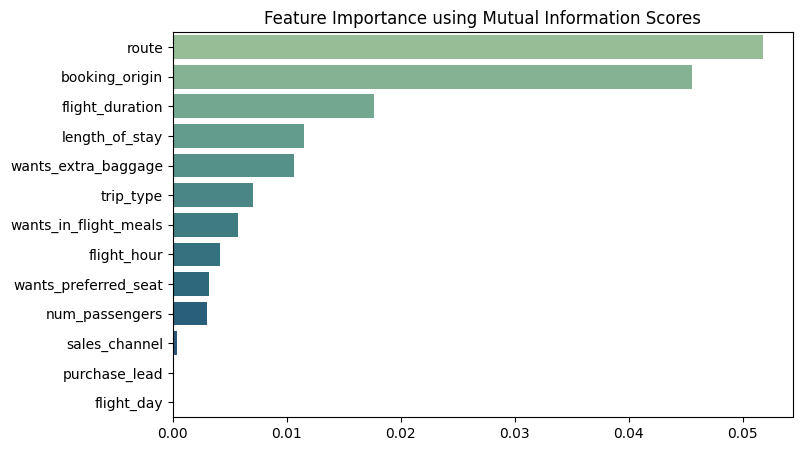

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Feature_Importance_Score", y="Columns", data=fi_df, palette="crest")
plt.title("Feature Importance using Mutual Information Scores")
plt.xlabel("")
plt.ylabel("")
plt.show()

# Model Training & Cross-Validation

In [25]:
# Function to split the data into training and validation set.
def train_val_split(X, y):
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=7)
    return train_X, val_X, train_y, val_y

# Function to select the top-n or all the features from data.
def selecting_top_n_or_all_features(n=5):
    if str(n).lower() == "all":
        X = df[list(fi_df.Columns)]
    else:
        X = df[list(fi_df.Columns[:n])]
    # One-Hot-Encoding the variables which were Categorical variables prior to Label-Encoding.
    for col in X.select_dtypes("int32"):
        X = pd.get_dummies(X, columns=[col])
    return X

# Function to fit the data on RandomForestClassifier and product training and validation scores.
def fit_rfc(top_n):
    X = selecting_top_n_or_all_features(top_n)
    train_X, val_X, train_y, val_y = train_val_split(X, y)

    # Normalizing the Dataset.
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    val_X = scaler.transform(val_X)
    
    model = RandomForestClassifier(random_state=7)
    model.fit(train_X, train_y)
    
    train_y_pred = model.predict(train_X)
    val_y_pred = model.predict(val_X)
    
    print("Training Accuracy Score:", accuracy_score(train_y, train_y_pred))
    print("Validation Accuracy Score:", accuracy_score(val_y, val_y_pred))

In [27]:
print("\n===== Model Evaluation for Top-10 features =====\n")
fit_rfc(10)


===== Model Evaluation for Top-10 features =====

Training Accuracy Score: 0.9917
Validation Accuracy Score: 0.8376


In [28]:
print("\n===== Model Evaluation for All features =====\n")
fit_rfc("all")


===== Model Evaluation for All features =====

Training Accuracy Score: 0.999825
Validation Accuracy Score: 0.8503
